## Project #4: Binary Logistic Regression

Lillian Jensen

Data Notes: This data is the same data we used for Module 5 – Linear Regression. In Module 5, we used this data to practice linear regression using hospital charges ($$) as our dependent variable. In this module we are using the same data to model in-hospital mortality (a new variable added to the database), and hospital charge data as a binary dependent variable. A list of variables, descriptions, and codes is included on D2L (Logistic Regression Codebook.doc). You will need this information while you are doing your analyses and especially while you are interpreting your results. You are being asked to look at this data to help a researcher answer two questions: 1) What patient characteristics can be used to predict death in the hospital, and 2) What characteristics can be used to predict hospital charges that might be inflated. The investigator has no idea what they mean by “inflated charges” and says to make some recommendations.

---

In [41]:
# Setting up code environment
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(comprehenr))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(rstatix))

In [116]:
df <- read.csv("C:\\Users\\ljens\\Downloads\\HM 878 730 Clements - Logistic Regression R Data.csv")
colnames(df)

[1] "HospCharges"       "Death"             "Age"              
 [4] "Income_Zip"        "Insurance"         "Number_Diagnoses" 
 [7] "Number_Procedures" "Race"              "Sex"              
[10] "Urban_Rural"       "Weighting"

In [117]:
pred_percent <- function(mod, dep_var, name){
    prob = predict(mod, type = 'response')
    lab = ifelse(prob >= 0.5, 1, 0)
    accuracy = mean(lab == {{dep_var}}, na.rm = T)

    paste('Accuracy for ', name, ': ', round(accuracy*100,2), '%')
}

chi_log <- function(model, data, name = "model"){
    residuals <- stats::residuals(model, type = "pearson")
    pearson_chi_square <- sum(residuals^2)
    df_ <- nrow(data) - length(coefficients(model))
    p_value <- 1 - stats::pchisq(pearson_chi_square, df_)

    cat(
        "Pearson Goodness of Fit Test\n",
        "Null Hypothesis: The model fits.\n",
        "Alternative Hypothesis: The model does not fit.\n\n",
        "Pearson chi-squared for", paste0(name, ": "), round(pearson_chi_square, 2), "\n",
        "Degrees of freedom for", paste0(name, ": "), df_, "\n",
        "P-value for", paste0(name, ": "), p_value, "\n\n",
        "---\n",
        ifelse(round(p_value, 2) < 0.05, 
        "Null Hypothesis is rejected. The model does not fit.\n", 
        "Failed to reject Null Hypothesis. The model fits.\n"),
        "---"
        )
}

fences <- function(x){
    Q1 <- stats::quantile(x, 0.25)
    Q3 <- stats::quantile(x, 0.75)
    IQR_value <- stats::IQR(x)
    k <- 1.5
    lower_fence <- Q1 - k * IQR_value
    upper_fence <- Q3 + k * IQR_value

    return(
        data.frame(Lower = lower_fence, Upper = upper_fence)
    )
}

---

## Regression 1 - Death

1. Use the following variables from the dataset: Dependent variable: Death.  Independent variables: Age, Income_Zip, Insurance, Number_Diagnoses, Number_Procedures, Race, Sex, and Urban_Rural.  Review the Codebook to learn more about these variables. Run a binary logistic regression analysis with Death as the Dependent Variable. Make sure to tell me how you specified which categories of your independent variables are the reference categories. Be sure to review the Codebook for the Income variable for more information, and apply this technique to the other categorical independent variables. Fully interpret your model with the appropriate information as shown in the Demo video.

In [118]:
df$Income_Zip <- factor(df$Income_Zip, levels = c(1,2,3,4), labels = c('Q1 (lowest)', 'Q2','Q3','Q4 (highest)'))

In [120]:
mod1 <- glm(Death ~ 1, data = df, family = binomial)
mod2 <- glm(Death ~ Age  + Income_Zip  + Insurance  + Number_Diagnoses  + 
            Number_Procedures  + Race  + Sex  + Urban_Rural, 
            data=df, family = binomial
            )

In [121]:
summary(mod1)


Call:
glm(formula = Death ~ 1, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7673  -0.7673  -0.7673   1.6532   1.6532  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0721     0.1622  -6.609 3.88e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 227.1  on 199  degrees of freedom
Residual deviance: 227.1  on 199  degrees of freedom
AIC: 229.1

Number of Fisher Scoring iterations: 4


In [122]:
summary(mod2)


Call:
glm(formula = Death ~ Age + Income_Zip + Insurance + Number_Diagnoses + 
    Number_Procedures + Race + Sex + Urban_Rural, family = binomial, 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5532  -0.6211  -0.4487  -0.2961   2.2809  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.666429   0.819293  -3.255  0.00114 ** 
Age                     0.004823   0.009432   0.511  0.60910    
Income_ZipQ2            0.485204   0.560610   0.865  0.38677    
Income_ZipQ3            0.940616   0.595635   1.579  0.11429    
Income_ZipQ4 (highest)  1.227584   0.620474   1.978  0.04788 *  
Insurance              -0.354555   0.437513  -0.810  0.41772    
Number_Diagnoses       -0.034403   0.036171  -0.951  0.34154    
Number_Procedures       0.065499   0.101202   0.647  0.51749    
Race                    2.074423   0.415804   4.989 6.07e-07 ***
Sex                     0.156445   0.388864   0.402  0.6

In [123]:
pred_percent(mod1,df['Death'],'mod1')

[1] "Accuracy for  mod1 :  74.5 %"

In [124]:
pred_percent(mod2,df['Death'],'mod2')

[1] "Accuracy for  mod2 :  69.5 %"

In [125]:
chi_log(mod1, df, name = 'mod1')

Pearson Goodness of Fit Test
 Null Hypothesis: The model fits.
 Alternative Hypothesis: The model does not fit.

 Pearson chi-squared for mod1:  200 
 Degrees of freedom for mod1:  199 
 P-value for mod1:  0.4667457 

 ---
 Failed to reject Null Hypothesis. The model fits.
 ---

In [126]:
chi_log(mod2, df, name = 'mod2')

Pearson Goodness of Fit Test
 Null Hypothesis: The model fits.
 Alternative Hypothesis: The model does not fit.

 Pearson chi-squared for mod2:  184.54 
 Degrees of freedom for mod2:  189 
 P-value for mod2:  0.5779588 

 ---
 Failed to reject Null Hypothesis. The model fits.
 ---

2. If necessary, explain how you will revise your model to deal with outliers or multicollinearity. Rerun the model if necessary. If you don’t believe this is necessary, explain why (and yes…you can make an argument either way). For your final model, fully interpret your regression coefficients (odds ratios).

Two of our independent variables are continuous. Let's check them for outliers

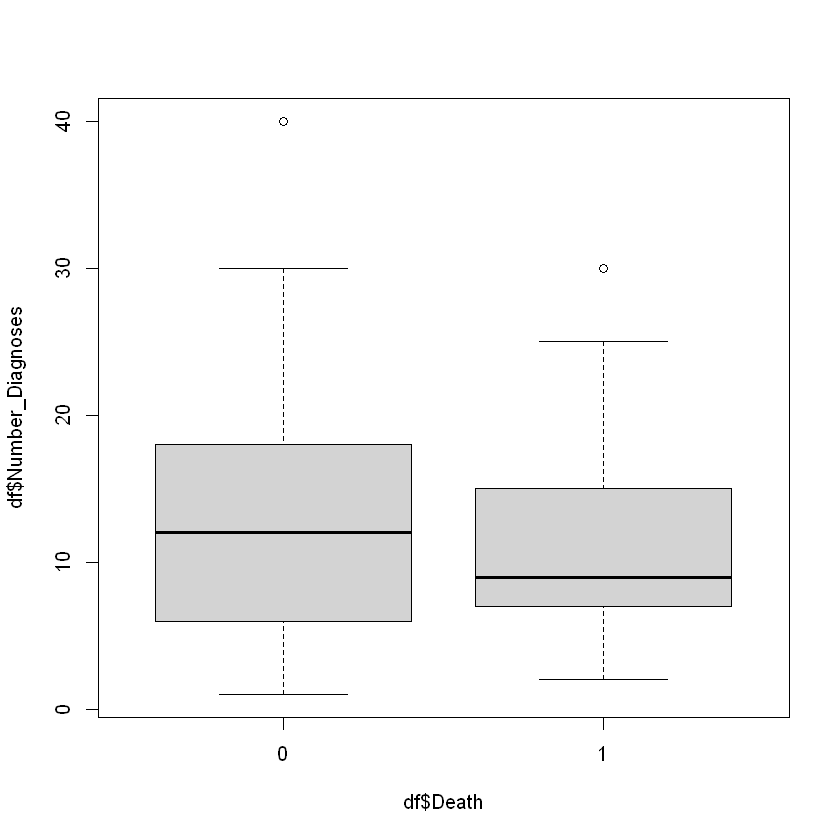

In [80]:
boxplot(df$Number_Diagnoses ~ df$Death)

In [83]:
fences(df$Number_Diagnoses)$Upper

[1] 32.375

In [84]:
df[df$Number_Diagnoses >= fences(df$Number_Diagnoses)$Upper,]$Death

[1] 0 0

There are two outliers in Number_Diagnoses, and both belong to the 'alive' category. This seems like meaningful information for our model, so I will leave these outliers in.

Now let's check for outliers in Number_Diagnoses

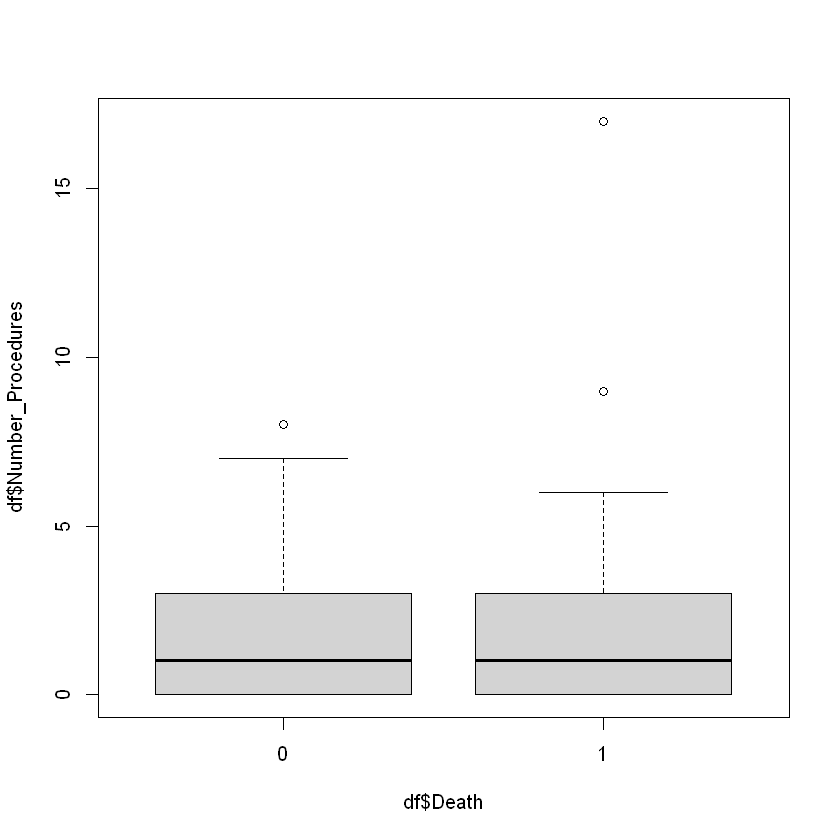

In [81]:
boxplot(df$Number_Procedures ~ df$Death)

In [82]:
fences(df$Number_Procedures)$Upper

[1] 7.5

In [63]:
df[df$Number_Procedures >= fences(df$Number_Procedures)$Upper,]$Death

[1] 1 0 1 0

There are four outliers in Number_Procedures, and they are evenly split between the 'alive' and 'dead' categories, possibly causing noise in the data. We should consider cutting these outliers.

Before we do, however, let's take a look at multicollinearity

In [85]:
ind_vars <- c(
            'Age','Income_Zip','Insurance','Number_Diagnoses',
            'Number_Procedures','Race','Sex','Urban_Rural'
                )

In [72]:
ind_df <- df |> select(all_of(ind_vars))

In [78]:
print(cor_mat(ind_df, method = 'spearman'))

# A tibble: 8 × 9
  rowname             Age Incom…¹ Insur…² Numbe…³ Numbe…⁴    Race    Sex Urban…⁵
* <chr>             <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>  <dbl>   <dbl>
1 Age              1       0.12   -3.8e-1  0.57    -0.19  -2.7e-1 -0.12  -0.0059
2 Income_Zip       0.12    1       1  e-1 -0.0064  -0.036 -6.1e-2  0.062 -0.34  
3 Insurance       -0.38    0.1     1  e+0 -0.44     0.056  4.5e-4  0.039 -0.0056
4 Number_Diagnos…  0.57   -0.0064 -4.4e-1  1        0.023 -1.4e-1 -0.048 -0.007 
5 Number_Procedu… -0.19   -0.036   5.6e-2  0.023    1      3.2e-2  0.055 -0.14  
6 Race            -0.27   -0.061   4.5e-4 -0.14     0.032  1  e+0  0.1   -0.17  
7 Sex             -0.12    0.062   3.9e-2 -0.048    0.055  1  e-1  1     -0.032 
8 Urban_Rural     -0.0059 -0.34   -5.6e-3 -0.007   -0.14  -1.7e-1 -0.032  1     
# … with abbreviated variable names ¹​Income_Zip, ²​Insurance, ³​Number_Diagnoses,
#   ⁴​Number_Procedures, ⁵​Urban_Rural


In [79]:
print(cor_get_pval(cor_mat(ind_df, method = 'spearman')))

# A tibble: 8 × 9
  rowname           Age Incom…¹ Insura…² Number…³ Numbe…⁴    Race    Sex Urban…⁵
  <chr>           <dbl>   <dbl>    <dbl>    <dbl>   <dbl>   <dbl>  <dbl>   <dbl>
1 Age          0        9.01e-2 2.43e- 8 6.01e-19 0.00676 1.34e-4 0.0952 9.34e-1
2 Income_Zip   9.01e- 2 0       1.54e- 1 9.29e- 1 0.616   4.03e-1 0.39   1.06e-6
3 Insurance    2.43e- 8 1.54e-1 0        1.12e-10 0.434   9.95e-1 0.588  9.38e-1
4 Number_Diag… 6.01e-19 9.29e-1 1.12e-10 0        0.744   4.51e-2 0.503  9.21e-1
5 Number_Proc… 6.76e- 3 6.16e-1 4.34e- 1 7.44e- 1 0       6.55e-1 0.442  5.54e-2
6 Race         1.34e- 4 4.03e-1 9.95e- 1 4.51e- 2 0.655   0       0.142  1.43e-2
7 Sex          9.52e- 2 3.9 e-1 5.88e- 1 5.03e- 1 0.442   1.42e-1 0      6.53e-1
8 Urban_Rural  9.34e- 1 1.06e-6 9.38e- 1 9.21e- 1 0.0554  1.43e-2 0.653  0      
# … with abbreviated variable names ¹​Income_Zip, ²​Insurance, ³​Number_Diagnoses,
#   ⁴​Number_Procedures, ⁵​Urban_Rural


Age and Number_Diagnoses are the only two variables with significantly large (>0.50) collinearities. As we saw in the last worksheet, it is best to retain both of those variables because they both contribute to the model.

Let's try building a model with the Number_Prodecures outliers removed.

In [129]:
df <- read.csv("C:\\Users\\ljens\\Downloads\\HM 878 730 Clements - Logistic Regression R Data.csv")
colnames(df)

[1] "HospCharges"       "Death"             "Age"              
 [4] "Income_Zip"        "Insurance"         "Number_Diagnoses" 
 [7] "Number_Procedures" "Race"              "Sex"              
[10] "Urban_Rural"       "Weighting"

In [130]:
df$Income_Zip <- factor(df$Income_Zip, levels = c(1,2,3,4), labels = c('Q1 (lowest)', 'Q2','Q3','Q4 (highest)'))
df <- df[df$Number_Procedures < fences(df$Number_Procedures)$Upper,]

In [133]:
mod3 <- glm(Death ~ 1, data = df, family = binomial)
mod4 <- glm(Death ~ Age  + Income_Zip  + Insurance  + Number_Diagnoses  + 
            Number_Procedures  + Race  + Sex  + Urban_Rural, 
            data=df, family = binomial
            )


summary(mod3)
summary(mod4)

pred_percent(mod3,df['Death'],'mod3')
pred_percent(mod4,df['Death'],'mod4')


chi_log(mod3, df, name = 'mod3')

chi_log(mod4, df, name = 'mod4')



Call:
glm(formula = Death ~ 1, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7585  -0.7585  -0.7585  -0.1526   1.6651  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.099      0.165   -6.66 2.74e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 220.44  on 195  degrees of freedom
Residual deviance: 220.44  on 195  degrees of freedom
AIC: 222.44

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Death ~ Age + Income_Zip + Insurance + Number_Diagnoses + 
    Number_Procedures + Race + Sex + Urban_Rural, family = binomial, 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5448  -0.6350  -0.4503  -0.2884   2.3085  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.728202   0.840252  -3.247  0.00117 ** 
Age                     0.004502   0.009521   0.473  0.63630    
Income_ZipQ2            0.566381   0.577203   0.981  0.32647    
Income_ZipQ3            1.078664   0.609900   1.769  0.07696 .  
Income_ZipQ4 (highest)  1.259926   0.628379   2.005  0.04496 *  
Insurance              -0.288530   0.439072  -0.657  0.51109    
Number_Diagnoses       -0.035027   0.036756  -0.953  0.34062    
Number_Procedures       0.056505   0.117290   0.482  0.62998    
Race                    2.045715   0.422652   4.840  1.3e-06 ***
Sex                     0.248639   0.395901   0.628  0.5

[1] "Accuracy for  mod3 :  75 %"

[1] "Accuracy for  mod4 :  69.9 %"

Pearson Goodness of Fit Test
 Null Hypothesis: The model fits.
 Alternative Hypothesis: The model does not fit.

 Pearson chi-squared for mod3:  196 
 Degrees of freedom for mod3:  195 
 P-value for mod3:  0.4664079 

 ---
 Failed to reject Null Hypothesis. The model fits.
 ---Pearson Goodness of Fit Test
 Null Hypothesis: The model fits.
 Alternative Hypothesis: The model does not fit.

 Pearson chi-squared for mod4:  180.47 
 Degrees of freedom for mod4:  185 
 P-value for mod4:  0.5802394 

 ---
 Failed to reject Null Hypothesis. The model fits.
 ---

In [132]:
pred_percent(mod1, df$Death, "mod1")
pred_percent(mod2, df$Death, "mod2")
pred_percent(mod3, df$Death, "mod3")
pred_percent(mod4, df$Death, "mod4")

Warning message in lab == {:
"longer object length is not a multiple of shorter object length"


[1] "Accuracy for  mod1 :  73.5 %"

Warning message in lab == {:
"longer object length is not a multiple of shorter object length"


[1] "Accuracy for  mod2 :  68.37 %"

[1] "Accuracy for  mod3 :  75 %"

Warning message in lab == {:
"longer object length is not a multiple of shorter object length"


[1] "Accuracy for  mod4 :  69.9 %"

---

## Regression 2 - Hospital Charges

1. Hospital charges is currently a continuous, quantitative variable. You need to create a new variable that is a binary, categorical variable with a cutoff at a certain dollar amount that separates high costs from low costs. You can use any cutoff you want, but you must justify your choice of cutoff (e.g. use some of the descriptive statistics to propose a cutoff, or use some research literature to justify how you determine the cutoff). Run a logistic regression with your newly created variable as the dependent variable and Age, Income_Zip, Insurance, Number_Diagnoses, Number_Procedures, Race, Sex, and Urban_Rural as the independent variables. Fully interpret your initial model (again, being sure to explain your independent variable reference categories).

In [216]:
colnames()

[1] "HospCharges"       "Death"             "Age"              
 [4] "Income_Zip"        "Insurance"         "Number_Diagnoses" 
 [7] "Number_Procedures" "Race"              "Sex"              
[10] "Urban_Rural"       "Weighting"

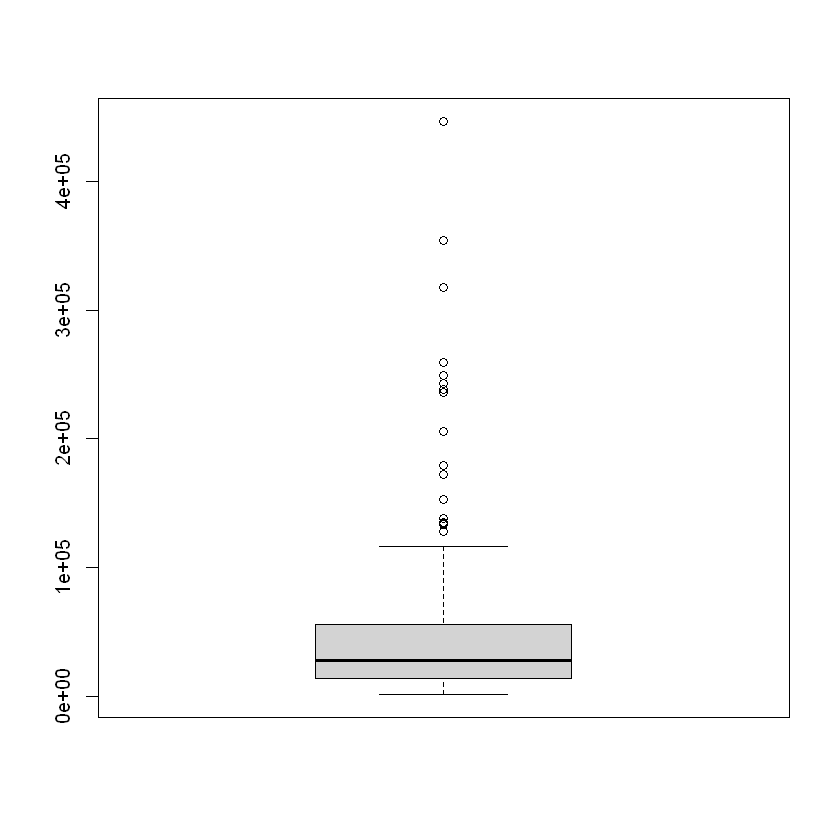

In [217]:
boxplot(df$HospCharges)

In [143]:
summary(df$HospCharges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1514   13789   27384   44774   53585  353704 

In [145]:
summary(df$HospCharges)[[5]]

[1] 53585.25

In [134]:
fences(df$HospCharges)$Upper

[1] 113279.6

In [153]:
nrow(df[df$HospCharges > fences(df$HospCharges)$Upper,])

[1] 17

In [154]:
nrow(df[df$HospCharges > summary(df$HospCharges)[[5]],])

[1] 49

In [157]:
nrow(df[df$HospCharges > sd(df$HospCharges) + mean(df$HospCharges),])

[1] 17

In [156]:
sd(df$HospCharges) + mean(df$HospCharges)

[1] 98102.34

In [174]:
cut <- round(fences(df$HospCharges)$Upper,0)

In [175]:
cut

[1] 113280

In [176]:
df$charges <- ifelse(df$HospCharges<cut, 0, 1)

In [177]:
mod1 <- glm(charges ~ 1, data = df, family = binomial)
mod2 <- glm(charges ~ Age  + Income_Zip  + Insurance  + Number_Diagnoses  + 
            Number_Procedures  + Race  + Sex  + Urban_Rural, 
            data=df, family = binomial
            )


summary(mod1)
summary(mod2)

pred_percent(mod1,df['charges'],'mod1')
pred_percent(mod2,df['charges'],'mod2')


chi_log(mod1, df, name = 'mod1')

chi_log(mod2, df, name = 'mod2')


Call:
glm(formula = charges ~ 1, family = binomial, data = df)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-0.426  -0.426  -0.426  -0.426   2.211  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.3542     0.2538  -9.276   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 115.61  on 195  degrees of freedom
Residual deviance: 115.61  on 195  degrees of freedom
AIC: 117.61

Number of Fisher Scoring iterations: 5



Call:
glm(formula = charges ~ Age + Income_Zip + Insurance + Number_Diagnoses + 
    Number_Procedures + Race + Sex + Urban_Rural, family = binomial, 
    data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.83579  -0.35360  -0.21799  -0.00027   2.85505  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -6.68878    1.95359  -3.424 0.000617 ***
Age                       0.01092    0.01978   0.552 0.580952    
Income_ZipQ2              1.24627    1.18471   1.052 0.292813    
Income_ZipQ3              1.30810    1.25100   1.046 0.295724    
Income_ZipQ4 (highest)    0.77387    1.31290   0.589 0.555572    
Insurance                 0.59816    0.74539   0.802 0.422277    
Number_Diagnoses          0.10317    0.05164   1.998 0.045741 *  
Number_Procedures         0.60172    0.16903   3.560 0.000371 ***
Race                      0.41217    0.73265   0.563 0.573724    
Sex                      -0.67086 

[1] "Accuracy for  mod1 :  91.33 %"

[1] "Accuracy for  mod2 :  88.78 %"

Pearson Goodness of Fit Test
 Null Hypothesis: The model fits.
 Alternative Hypothesis: The model does not fit.

 Pearson chi-squared for mod1:  196 
 Degrees of freedom for mod1:  195 
 P-value for mod1:  0.4664079 

 ---
 Failed to reject Null Hypothesis. The model fits.
 ---Pearson Goodness of Fit Test
 Null Hypothesis: The model fits.
 Alternative Hypothesis: The model does not fit.

 Pearson chi-squared for mod2:  149.12 
 Degrees of freedom for mod2:  185 
 P-value for mod2:  0.9753785 

 ---
 Failed to reject Null Hypothesis. The model fits.
 ---

2. Now that you have run this regression model, evaluate whether your model needs to be revised. Pay attention to outliers, and multicollinearity (and for these purposes, you might consider moderate correlation as suggestive of multicollinearity). In addition, you should consider whether your cutoff to develop your categorical dependent variable should be revised at all. Run as many regression models as you need to based on these revisions. Fully explain why you are making the choices you make. Note: Most analyses like these are all about decision-making. There are tradeoffs in all of the models and with the decisions you make. Justify your choices.


3. Choose one model as your best fit model, interpret the findings and describe what the regression coefficients (odds ratios) mean.

---

## Answer this question:

- When you did a linear regression model in Module 5, you used hospital charges as a continuous dependent variable, and here you used a categorical version of that same variable. How are the results of the two models similar and how do they differ? Describe different situations when you would use each of the models.